In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/currency-20240703T151853Z-001/currency/dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 66 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'fake': 0, 'real': 1}

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/currency-20240703T151853Z-001/currency/dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 53 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = testing_set, validation_data = training_set, epochs = 50)

Epoch 1/50
2/2 [==============================] - 2s 2s/step - loss: 58.7958 - accuracy: 0.8302 - val_loss: 16.7515 - val_accuracy: 0.8030
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 6.4804 - accuracy: 0.8868 - val_loss: 3.3767 - val_accuracy: 0.8485
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 2.5165 - accuracy: 0.8868 - val_loss: 5.6954 - val_accuracy: 0.8030
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 3.0114 - accuracy: 0.8113 - val_loss: 1.9094 - val_accuracy: 0.6061
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 1.9380 - accuracy: 0.6415 - val_loss: 1.0529 - val_accuracy: 0.7273
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 0.9366 - accuracy: 0.7925 - val_loss: 0.5467 - val_accuracy: 0.7576
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 0.5227 - accuracy: 0.7736 - val_loss: 0.6100 - val_accuracy: 0.7121
Epoch 8/50
2/2 [=======================

In [ ]:
train_datagen = ImageDataGenerator(rescale = 0./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/currency-20240703T151853Z-001/currency/dataset/train',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 66 images belonging to 2 classes.


In [ ]:
import numpy as np

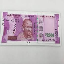

In [ ]:
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/currency-20240703T151853Z-001/currency/dataset/s2.jpg', target_size = (64, 64))
test_image

In [ ]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] <= 0.5:
  prediction = 'Fake Money'
else:
  prediction = 'Real Money'

1/1 [==============================] - 0s 33ms/step


In [ ]:
print(prediction)

Real Money
